<a href="https://colab.research.google.com/github/IshanKapadia-Data/HR_Employee_Attrition_Predictor/blob/main/HR_Employee_Attrition_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics: Employee Attrition Prediction 🚀

**Objective**: Build a machine learning model to predict whether an employee is likely to leave the organization (attrition), using HR data.
**Business Goal**:
- Help HR proactively identify high-risk employees
- Improve employee retention strategies using data-driven insights

## Load Data

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('HR Employee Attrition.csv')
df.shape

(1470, 35)

## Data Understanding

In [3]:
# Preview the first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Display dataset structure and count missing values in each column
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [5]:
# Calculate the percentage distribution of the target variable 'Attrition' (Yes vs. No)
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [6]:
# Check unique values in columns suspected to be constant or non-informative
for col in ['EmployeeCount', 'Over18', 'StandardHours']:
    print(f"{col}: {df[col].unique()}")


EmployeeCount: [1]
Over18: ['Y']
StandardHours: [80]


In [7]:
# Drop constant or identifier columns that do not contribute to predictive modeling
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [8]:
# Separate features into categorical and numerical columns based on data types
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
# Encode the target variable 'Attrition' as binary: Yes → 1, No → 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


## Exploratory Data Analysis (EDA)

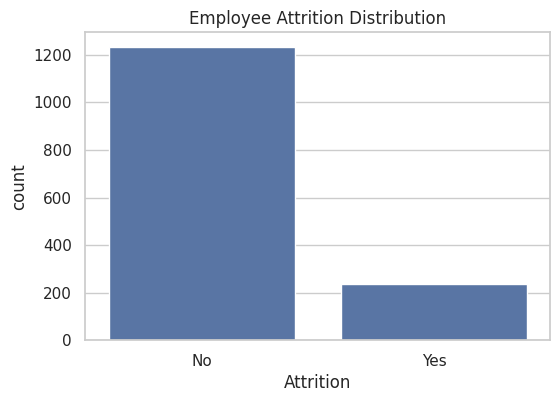

In [10]:
# Visualize the distribution of the target variable 'Attrition' to assess class imbalance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title("Employee Attrition Distribution")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


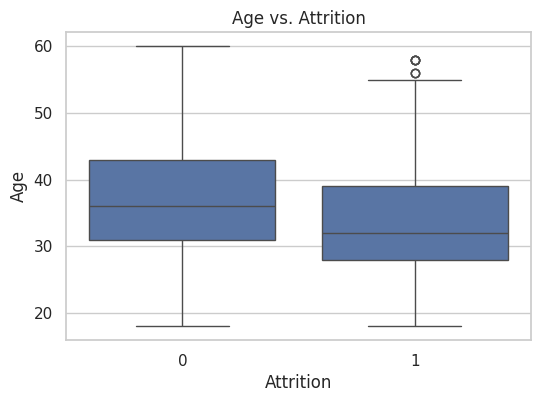

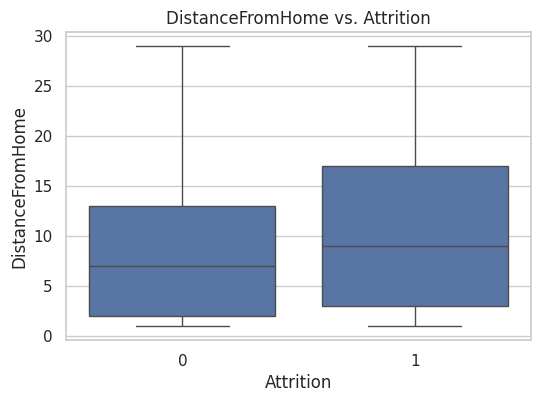

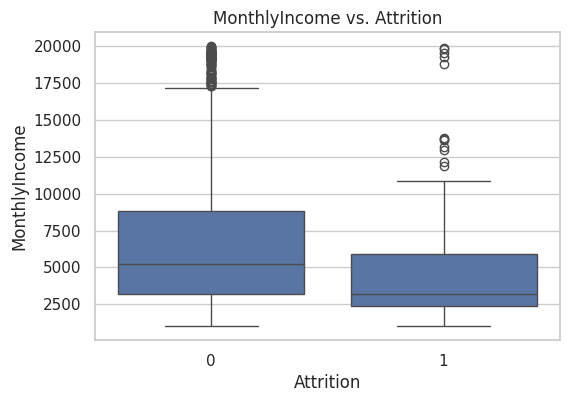

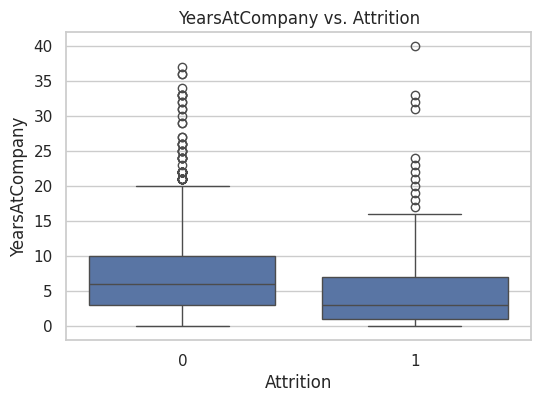

In [11]:
numerical_cols.remove('EmployeeNumber')  # ID-like, not useful

# Boxplots of numerical features vs Attrition
for col in ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f"{col} vs. Attrition")
    plt.show()

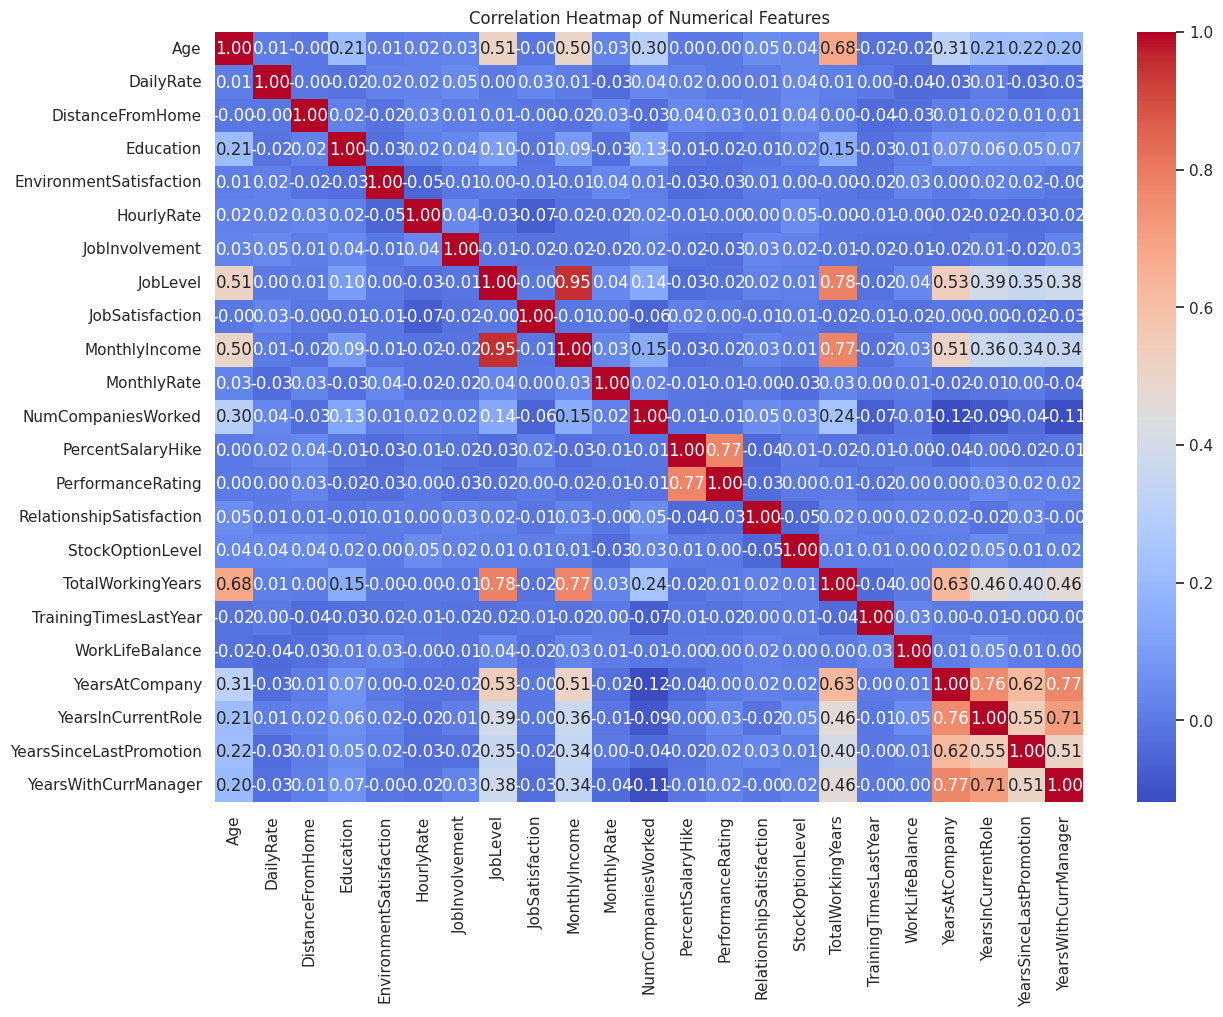

In [12]:
# Generate a correlation heatmap to identify relationships between numerical features
plt.figure(figsize=(14,10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


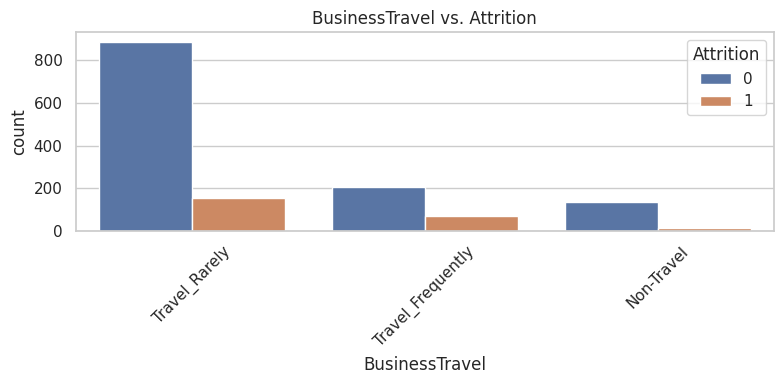

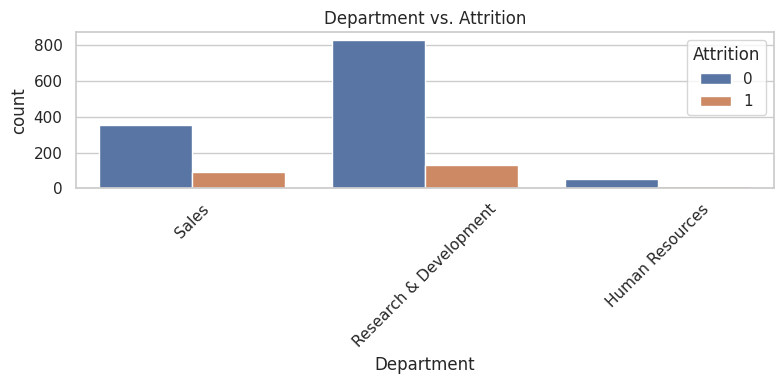

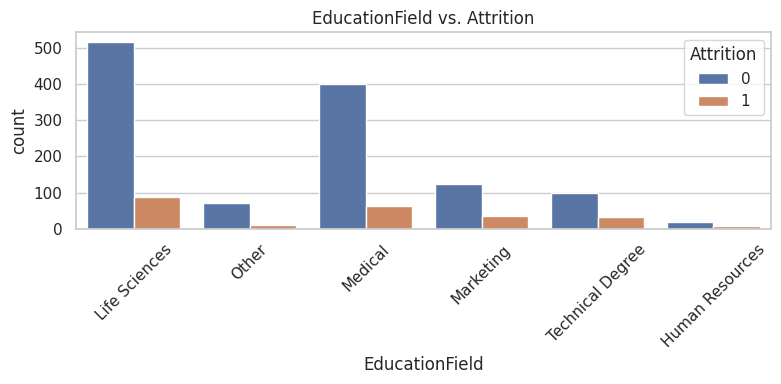

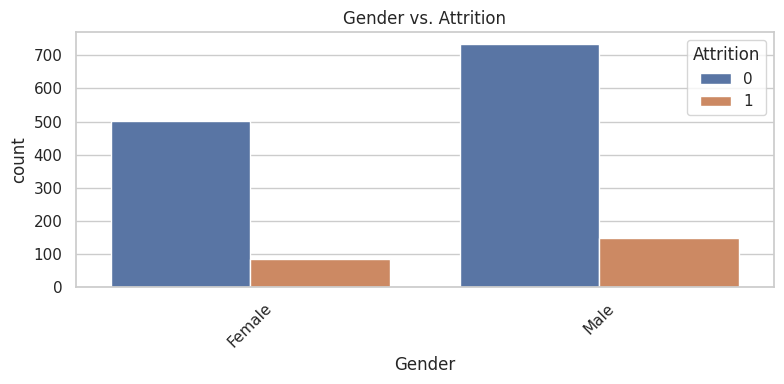

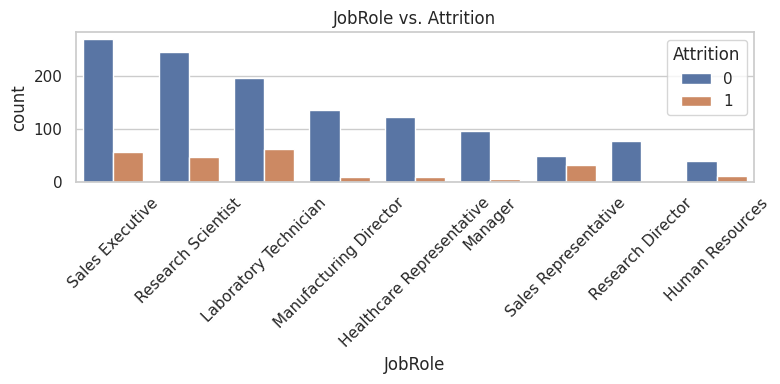

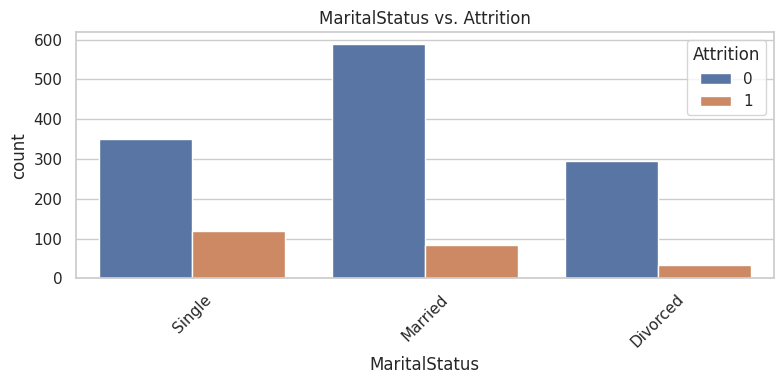

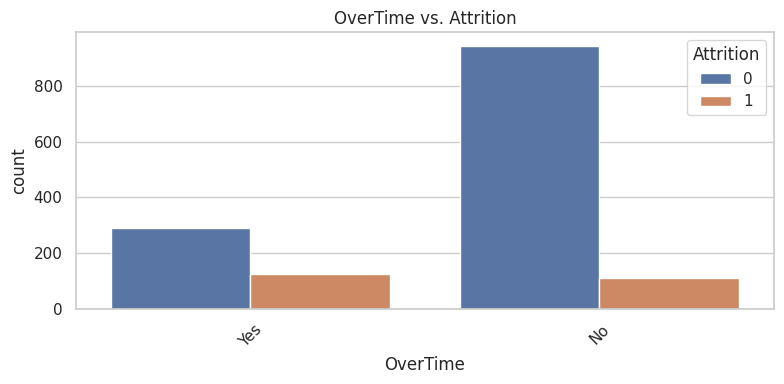

In [13]:
# Visualize the relationship between categorical features and Attrition using count plots
cat_features = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f"{col} vs. Attrition")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [14]:
# Create a normalized crosstab to show attrition rate (%) by Job Role, sorted by highest attrition
pd.crosstab(df['JobRole'], df['Attrition'], normalize='index').sort_values(1, ascending=False)


Attrition,0,1
JobRole,,
Sales Representative,0.602410,0.397590
Laboratory Technician,0.760618,0.239382
Human Resources,0.769231,0.230769
Sales Executive,0.825153,0.174847
Research Scientist,0.839041,0.160959
Manufacturing Director,0.931034,0.068966
Healthcare Representative,0.931298,0.068702
Manager,0.950980,0.049020
Research Director,0.975000,0.025000


## Data Preprocessing

In [15]:
# Drop 'EmployeeNumber' as it is an identifier and not useful for prediction
df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [16]:
# Encode categorical features for machine learning

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to binary categorical columns
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])         # Male=1, Female=0
df['OverTime'] = label_enc.fit_transform(df['OverTime'])     # Yes=1, No=0

# Apply One-Hot Encoding to multi-class categorical columns (drop_first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField',
                                 'JobRole', 'MaritalStatus'], drop_first=True)


In [17]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to normalize numerical features for consistent model performance
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


## Model Building & Evaluation

In [20]:
# Train a Logistic Regression model as a baseline classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [21]:
# Define a reusable evaluation function to print key classification metrics for any model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


In [22]:
# Evaluate the Logistic Regression model using the custom evaluation function
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


--- Logistic Regression ---
Accuracy: 0.8605442176870748
Precision: 0.6153846153846154
Recall: 0.3404255319148936
F1 Score: 0.4383561643835616
ROC-AUC: 0.6499698509776898
Confusion Matrix:
 [[237  10]
 [ 31  16]]




In [23]:
# Train a Random Forest classifier and evaluate its performance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Random Forest ---
Accuracy: 0.8333333333333334
Precision: 0.4
Recall: 0.0851063829787234
F1 Score: 0.14035087719298245
ROC-AUC: 0.5304074425015074
Confusion Matrix:
 [[241   6]
 [ 43   4]]




In [24]:
# Train an XGBoost classifier and evaluate its performance
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

evaluate_model(y_test, y_pred_xgb, "XGBoost")


--- XGBoost ---
Accuracy: 0.8639455782312925
Precision: 0.7058823529411765
Recall: 0.2553191489361702
F1 Score: 0.375
ROC-AUC: 0.6175381169782066
Confusion Matrix:
 [[242   5]
 [ 35  12]]




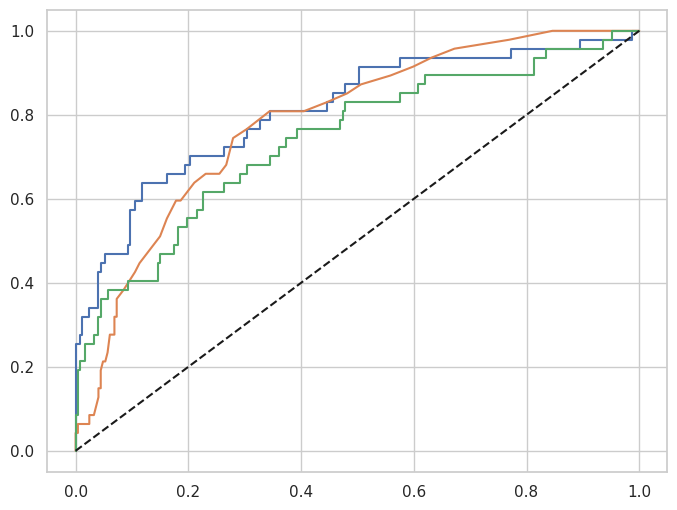

In [25]:
# Plot ROC curves for all models to visually compare their classification performance
from sklearn.metrics import roc_curve

models = {'Logistic': lr, 'Random Forest': rf, 'XGBoost': xgb_clf}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')  # Reference line for random guessing


## Hyperparameter Tuning – XGBoost

In [26]:
# Perform hyperparameter tuning on XGBoost using GridSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search with 3-fold cross-validation using F1 score
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [27]:
# Evaluate the best XGBoost model obtained from GridSearchCV
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

evaluate_model(y_test, y_pred_best_xgb, "Tuned XGBoost")


--- Tuned XGBoost ---
Accuracy: 0.8605442176870748
Precision: 0.7142857142857143
Recall: 0.2127659574468085
F1 Score: 0.32786885245901637
ROC-AUC: 0.5982858127315014
Confusion Matrix:
 [[243   4]
 [ 37  10]]




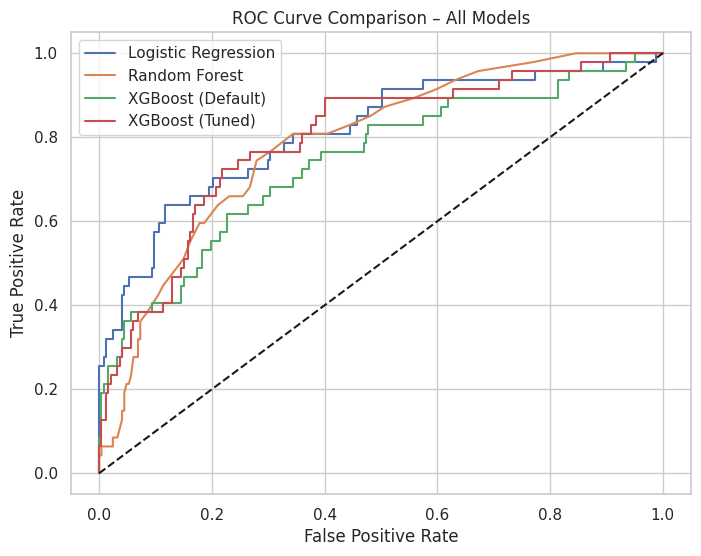

In [28]:
# Get probability scores for each model
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost (Default)': xgb_clf,
    'XGBoost (Tuned)': best_xgb
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

# Baseline
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – All Models')
plt.legend()
plt.grid(True)
plt.show()

## Save Final Model & Scaler

In [29]:
# Save the trained Random Forest model and the associated scaler for deployment
import joblib

# Save the model to a .pkl file
joblib.dump(rf, 'random_forest_model.pkl')

# Save the scaler used to normalize numeric features
joblib.dump(scaler, 'scalerRF.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


 ## Prediction Script for New Data

In [30]:
# Re-identify numeric feature columns to ensure consistent scaling during prediction
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [31]:
# Simulate a new employee profile using median values from training data
new_employee = pd.DataFrame([X_train.median().values], columns=X_train.columns)

# Apply scaling only to numeric features using the previously fitted scaler
new_employee_scaled = new_employee.copy()
new_employee_scaled[numeric_features] = scaler.transform(new_employee[numeric_features])

# Generate attrition prediction and probability using the saved model
prediction = model.predict(new_employee_scaled)[0]
probability = model.predict_proba(new_employee_scaled)[0][1]

print("Attrition Prediction:", "Yes" if prediction == 1 else "No")
print("Attrition Probability:", round(probability, 2))


Attrition Prediction: Yes
Attrition Probability: 0.95
